### Imports:

In [9]:
import numpy as np
import random
import data_generation
import high_precision_lr_SL as opt
import low_precision_lr_SL as lp
import precision_util as p_util
import naive_low_precision_lr_SL as naive
import halp_slow as hs

%matplotlib inline
import matplotlib.pyplot as plt

### Generating Data:
* n: number of data points
* d: number of dimensions
* s: scale factor for data (x)
* w: generated true weights (floating points range between -1 and 1)
* x: generated data (x - n by d) (int8 representation with s scale factor)
* y: generated labels for each x data point (floating point) - w*x^T
* xt: ignore this, just extra output from generation
* x_fp: full precision representation of x (floating point)

In [10]:
#n = 100000
n = 10000
d=100
s = 1/128.0
w,x,y,xt = data_generation.generate_data_low_precision_linear_regression(d,n,s)
x_fp = p_util.low_precision_to_float(x,s)

### Running normal SGD

In [6]:
weights_sgd = opt.sgd(0.0001, x_fp, y, 10*3*n)
loss_sgd = opt.loss(weights_sgd, x_fp, y)
print("Loss for SGD: " + str(loss_sgd))

Loss for SGD: 0.000530066930733


### Running normal SVRG

In [11]:
weights_svrg, time_array_normal_SVRG, loss_array_normal_SVRG = opt.svrg(0.0001, x_fp, y, 20, 2*n, calc_loss=True)
loss_svrg= opt.loss(weights_svrg, x_fp, y)
print("Loss for Full Precision SVRG: " + str(loss_svrg))

TypeError: svrg() missing 1 required positional argument: 'T'

#### Plotting Time

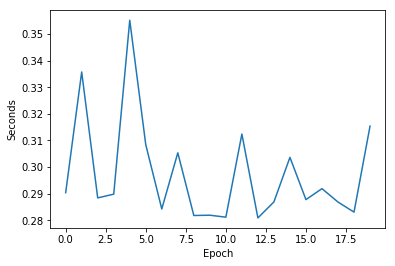

In [5]:
plt.plot(time_array_normal_SVRG)
plt.ylabel('Seconds')
plt.xlabel('Epoch')
plt.show()

#### Plotting Training Loss

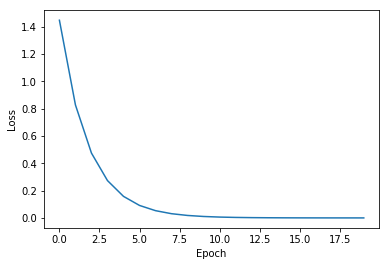

In [6]:
plt.plot(loss_array_normal_SVRG)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Running Naive LP SVRG  (sigma=1 b=16) = int16

In [3]:
weights_slow_lp_svrg, time_array_naive_LPSVRG, loss_array_naive_LPSVRG = naive.lp_svrg_lr(0.0001, x_fp, y, 20, 2*n)
loss_naive_LPSVRG= opt.loss(weights_slow_lp_svrg, x_fp, y)
print(loss_naive_LPSVRG)

9.07906158955


#### Plotting Time comparing with nornal SVRG

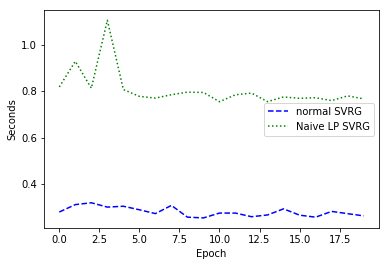

In [8]:
fig, ax = plt.subplots()
ax.plot(time_array_normal_SVRG, 'k--', color='b', label='normal SVRG')
ax.plot(time_array_naive_LPSVRG, 'k:',color='g', label='Naive LP SVRG')

plt.ylabel('Seconds')
plt.xlabel('Epoch')

legend = ax.legend(loc='right')
legend.get_frame()

plt.show()

#### Plotting Error comparing with nornal SVRG

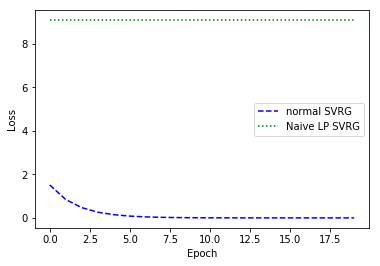

In [9]:
fig, ax = plt.subplots()
ax.plot(loss_array_normal_SVRG, 'k--', color='b', label='normal SVRG')
ax.plot(loss_array_naive_LPSVRG, 'k:',color='g', label='Naive LP SVRG')

plt.xlabel('Epoch')
plt.ylabel('Loss')

legend = ax.legend(loc='right')
legend.get_frame()

plt.show()

### LP-SVRG - Algorithm 3

In [3]:
weights_svrg_lp, time_array_LP_SVRG, loss_array_LP_SVRG = lp.svrg(0.0001, x, y, 10, 2*n, calc_loss=True)
loss_svrg_lp = opt.loss(weights_svrg_lp, x_fp, y)
print(loss_svrg_lp)

== > start epoch 1
Compute gradient -- Time cost:  0.16270661354064941
Begin quantize to green
Finished quantize to green, Time cost 0.0002601146697998047
Start epoch  0  inner iter
Finished epoch  1  inner iter, Total time cost  1.5033619403839111
     Time cost for gradident:  0.313140869140625
     Time cost for quantization:  0.779489278793335
     Time cost for dot product:  0.040303707122802734
     Time cost for summing:  0.16936564445495605
-----------------------------------------------
== > start epoch 2
Compute gradient -- Time cost:  0.17157697677612305
Begin quantize to green
Finished quantize to green, Time cost 0.0002732276916503906
Start epoch  1  inner iter
Finished epoch  2  inner iter, Total time cost  1.4862146377563477
     Time cost for gradident:  0.31107091903686523
     Time cost for quantization:  0.7721230983734131
     Time cost for dot product:  0.0395963191986084
     Time cost for summing:  0.16798734664916992
---------------------------------------------

In [14]:
weights_svrg_lp

array([ 0.01858521,  0.03503418,  0.050354  , -0.00924683,  0.02929688,
        0.02319336,  0.02737427,  0.01486206,  0.00366211,  0.0296936 ,
        0.01818848,  0.02502441,  0.02633667,  0.00097656,  0.01147461,
       -0.0005188 ,  0.00204468, -0.00848389,  0.01312256,  0.01025391])

In [15]:
loss_array_LP_SVRG

[0.34519367196477063,
 0.34490353721118161,
 0.34288427388358117,
 0.34296014020768489,
 0.34304606761857998,
 0.3418657362601869,
 0.34137706684825142,
 0.34116958668551955,
 0.34116545693376926,
 0.34126206157795336]

#### Plotting Time

NameError: name 'time_array_naive_LPSVRG' is not defined

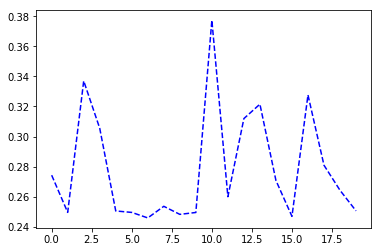

In [6]:
fig, ax = plt.subplots()
ax.plot(time_array_normal_SVRG, 'k--', color='b', label='normal SVRG')
ax.plot(time_array_naive_LPSVRG, 'k:',color='g', label='Naive LP SVRG')
ax.plot(time_array_LP_SVRG, 'k-.',color='r', label='LP SVRG')

plt.ylabel('Seconds')
plt.xlabel('Epoch')

legend = ax.legend(loc='right')
legend.get_frame()

plt.show()


plt.plot(time_array_lp)
plt.ylabel('Seconds')
plt.xlabel('Epoch')
plt.show()

#### Plotting Error

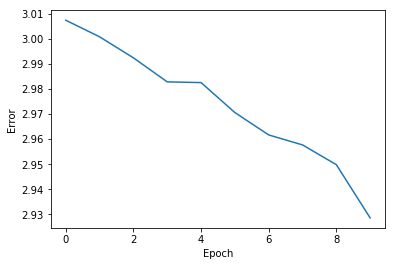

In [26]:
fig, ax = plt.subplots()
ax.plot(loss_array_normal_SVRG, 'k--', color='b', label='normal SVRG')
ax.plot(loss_array_naive_LPSVRG, 'k:',color='g', label='Naive LP SVRG')
ax.plot(loss_array_LP_SVRG, 'k-.',color='r', label='LP SVRG')


plt.xlabel('Epoch')
plt.ylabel('Loss')

legend = ax.legend(loc='right')
legend.get_frame()

plt.show()

## HALP (Slow)

In [8]:
weights_halp_slow, time_halp_slow_array, loss_halp_slow_array = hs.halp(0.0001, x_fp, y, 100)
loss_halp_slow = opt.loss(weights_halp_slow, x_fp, y)
print(loss_halp_slow)

3.54570255878e-05


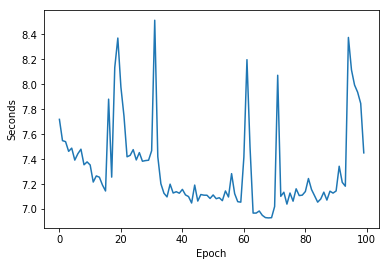

In [9]:
plt.plot(time_halp_slow_array)
plt.ylabel('Seconds')
plt.xlabel('Epoch')
plt.show()

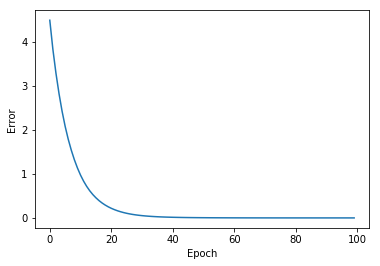

In [10]:
plt.plot(loss_halp_slow_array)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [11]:
loss_halp_slow_array[-1]

3.5457025587831383e-05